In [16]:
Data <- read.csv(file.path("..","data","training_data.csv"))
Data <- na.omit(Data)
dim(Data)
head(Data)

[1]  708 4872

,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


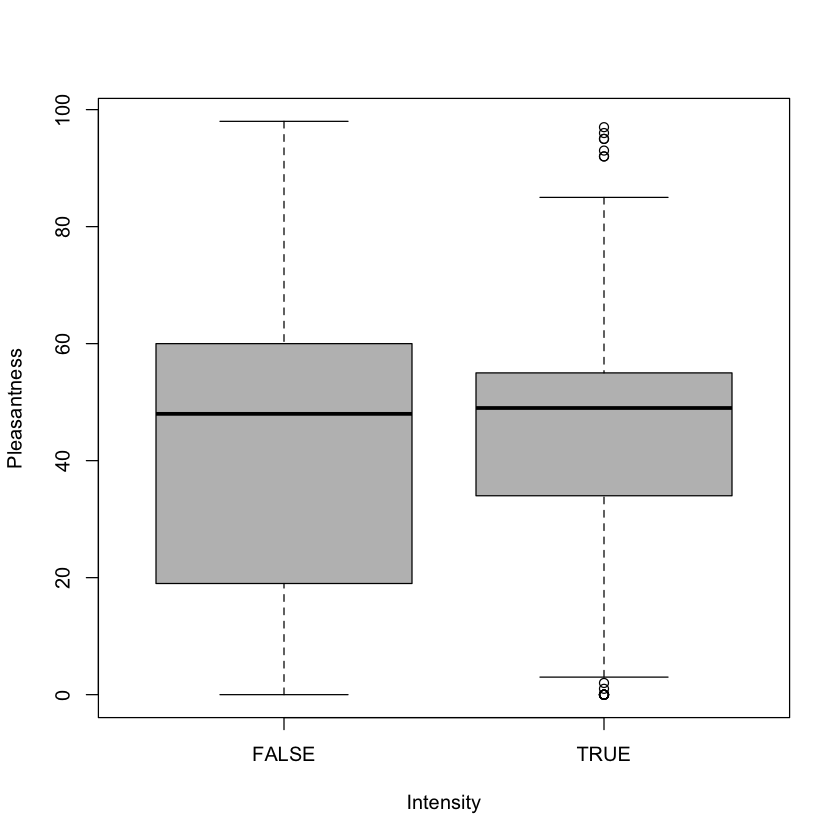

In [17]:
#plot pleasantness en fonction some features (intensity)

plot(Data$Intensity, Data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))




interpretation : 

--> on peut voir que sweet or sour devient true quand pleasantness augmente . 

In [18]:
# change the low or high Intensity to binary values 

lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


In [19]:
#trie des Data : statistical analysis, we remove column with var=0 and correleted ones.

library(caret)

data <- Data[, which(apply(Data, 2, var)!=0)] 

cormat<- cor(data)
highly_corr <- findCorrelation(cormat, 0.9)
data <- data[,-c(highly_corr)]
data_final<-data[, -3]
dim(data_final)
head(data_final)



[1] 708 852

,Intensity,VALENCE.PLEASANTNESS,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,1.131,0.111,2,2,5.7,3,0.571,0.5,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,1.120,0.053,0,1,5.3,1,0.000,1.0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,1.110,0.152,1,3,9.4,2,0.000,1.0,⋯,1,0,1,0,1,1,1,0,1,1
4,1,7,1.149,0.077,1,2,14.3,0,0.000,0.0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,1.123,0.091,0,1,4.5,1,0.000,1.0,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,1.125,0.200,1,2,6.7,1,0.000,1.0,⋯,0,0,0,0,1,0,1,0,1,0


In [187]:
#creation train/test set

set.seed(1)

data.x<-data_final[, -2]
data.y<-data_final$VALENCE.PLEASANTNESS


idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)

data.train.x <- data.x[idx.train,]
data.train.y<-data.y[idx.train]

data.test.x <- data.x[-idx.train,]
data.test.y<-data.y[-idx.train]

#verifier que var = 0 pour nvx subset

data.train.x_nonvar <- data.train.x[, which(apply(data.train.x, 2, var)!=0)] 

data.train<-cbind(data.train.y,data.train.x_nonvar)

data.test<- cbind(data.test.y, data.test.x)

In [30]:
#divide the new data : 
set.seed(1)

data.x<-data_final[, -2]
data.y<-data_final$VALENCE.PLEASANTNESS

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)

X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) == 0 # identify col with 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # exclude those pixels
data.train.y<-data.y[idx.train]
data.train<-cbind(data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
idx.zero.var <- apply(X.test, 2, var) == 0 # identify col with 
data.test.x <- data.frame(X.test[, !idx.zero.var]) # exclude those pixels
data.test.y<-data.y[-idx.train]
data.test<-cbind(data.test.y, data.test.x)

head(data.train)
head(data.test)


#pca.train
#pca.test

,data.train.y,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
679,49,0,1.140,0.273,1,1,2.9,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
129,53,0,1.147,0.217,0,1,4.2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
509,44,0,1.117,0.087,1,1,4.3,1,0,1,⋯,0,0,0,0,0,0,0,0,1,0
471,43,0,1.110,0.059,1,1,5.9,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
299,47,1,1.125,0.053,1,2,5.3,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
270,62,1,1.125,0.050,0,2,10.0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0


,data.test.y,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Inflammat.50,Depressant.80,Depressant.50,Hypertens.80,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,7,1,1.149,0.077,1,2,14.3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,51,0,1.123,0.091,0,1,4.5,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
6,21,1,1.125,0.200,1,2,6.7,1,0,1,⋯,0,0,0,0,1,0,1,0,1,0
7,56,0,1.099,0.083,0,1,4.3,2,0,1,⋯,0,0,0,0,1,0,0,0,1,0
8,52,0,1.144,0.200,0,0,0.0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,53,0,1.141,0.114,4,7,14.3,1,0,1,⋯,1,1,0,1,1,1,1,1,1,1


In [188]:
library(dplyr)
library(tidyr)
library(pls)
set.seed(2)
pcr_fit = pcr(data.y~., data = data_final, scale = TRUE, validation = "CV")

In [91]:
#summary(pcr_fit)

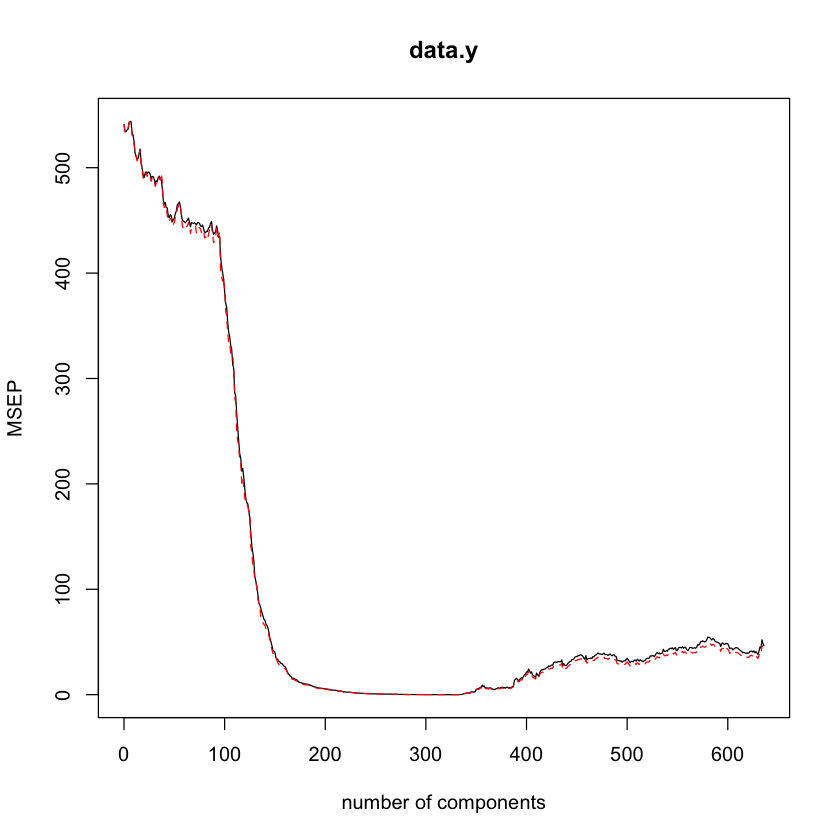

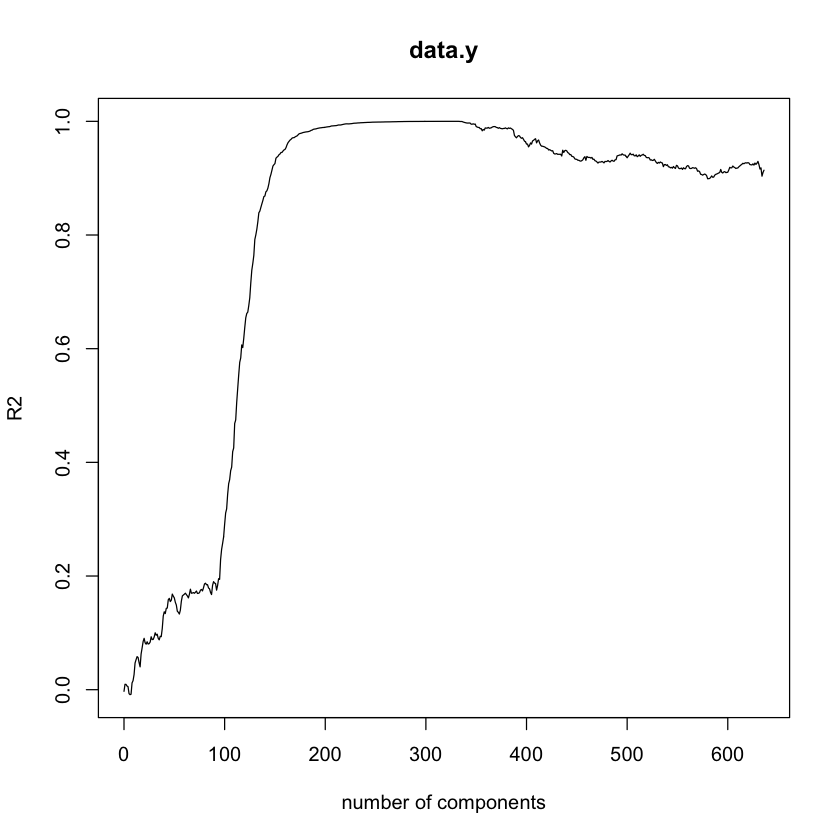

In [189]:
validationplot(pcr_fit, val.type = "MSEP")
validationplot(pcr_fit, val.type= "R2")


--> We find that MSE diminue when M=150 environ 

Now let's run on data.train

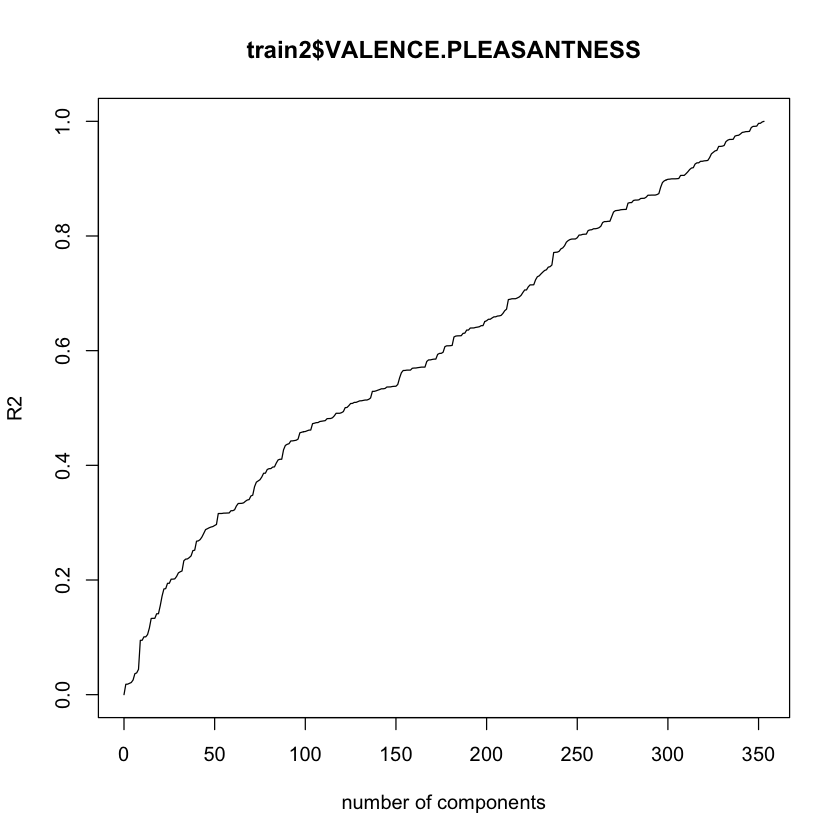

In [203]:
train = data_final %>%
  sample_frac(0.5)



#train<- train[, which(apply(train, 2, var)==0)] 
train2<-train[, which(apply(train, 2, var)>0.1)] 


pcr_fit2 = pcr(train2$VALENCE.PLEASANTNESS~., data = train2, scale = TRUE)
validationplot(pcr_fit2, val.type = "R2")



In [220]:
pcr_pred = predict(pcr_fit2, data.test, ncomp=10)
mean((pcr_pred-data.test.y)^2)

[1] 492.7487

In [221]:
#foward regression create new data
library(leaps)


regfit.fwd <- regsubsets(data_final$VALENCE.PLEASANTNESS ~ . ,  method = "forward", data_final, nvmax = 200)
regfit.fwd.summary <- summary(regfit.fwd)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“517  linear dependencies found”


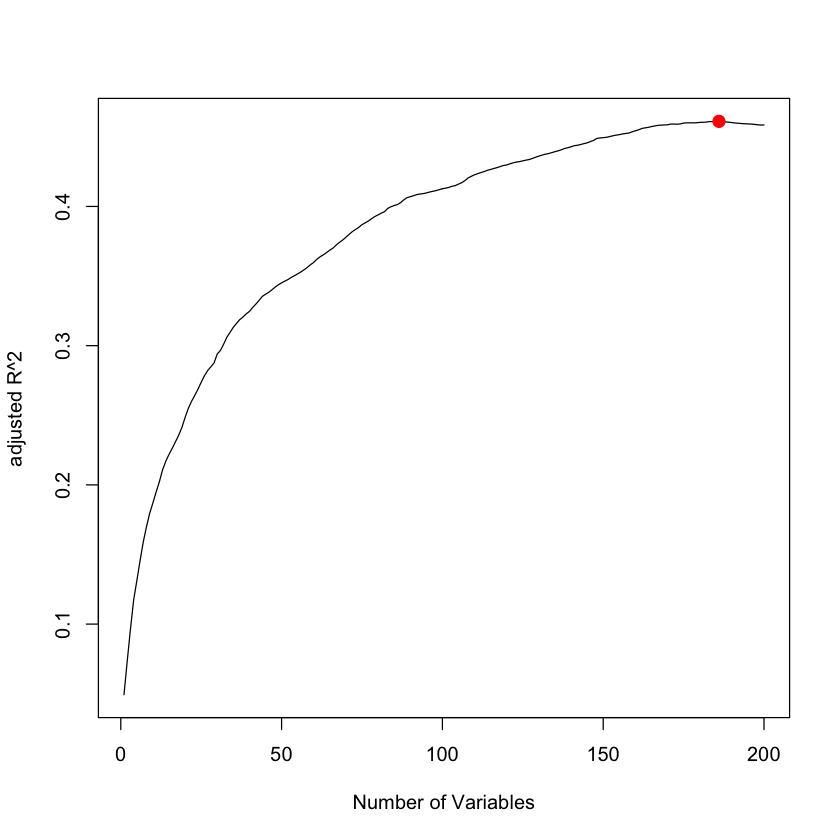

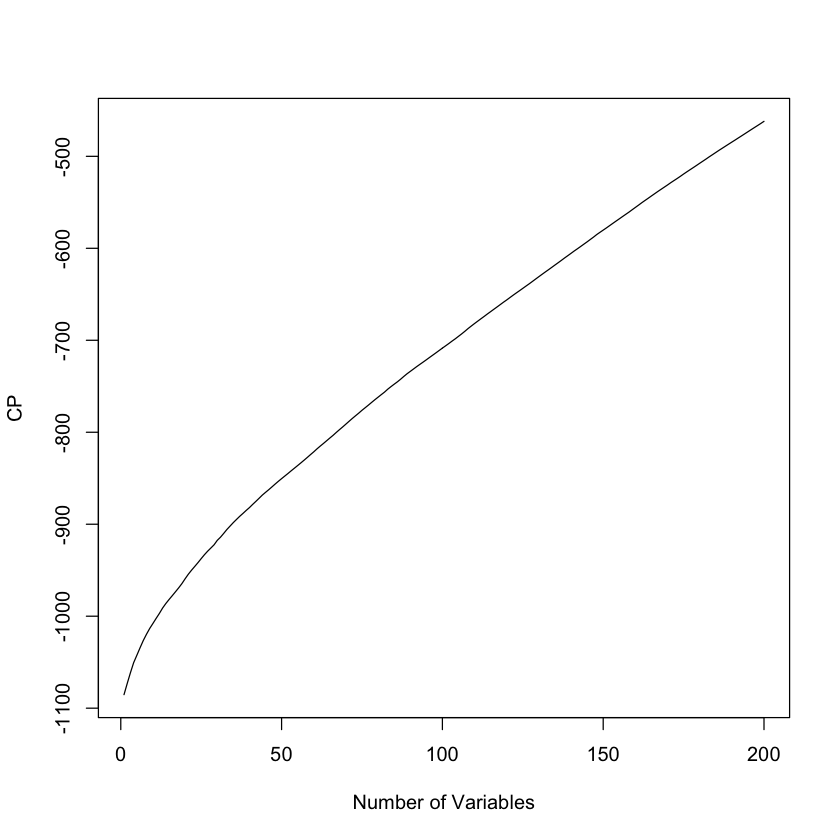

,Intensity,VALENCE.PLEASANTNESS,ZM1MulPer,BLI,ICR,X3A,X4A,X2v,IDDE,TI1_L,⋯,MLOGP2,BLTF96,DLS_05,LLS_01,LLS_02,Depressant.80,Depressant.50,Hypertens.50,Hypnotic.50,Neoplastic.50
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,0,45,177.580,1.095,2.149,0.173,0.111,5.411,3.107,18.510,⋯,9.154,-3.96,1.0,0.67,1,0,0,0,0,0
2,1,49,112.446,0.978,1.975,0.226,0.145,2.017,2.725,0.000,⋯,4.808,-3.25,0.5,1.00,1,0,0,0,0,0
3,1,56,275.179,0.895,2.441,0.198,0.135,3.787,3.419,26.659,⋯,10.254,-4.11,0.5,0.67,1,1,0,0,1,0
4,1,7,99.252,1.123,0.918,0.333,0.000,1.493,0.918,-4.593,⋯,0.344,-1.89,1.0,1.00,1,0,0,0,0,0
5,0,51,107.222,1.072,1.846,0.221,0.145,2.335,2.646,0.000,⋯,5.026,-3.30,0.5,1.00,1,0,0,0,0,0
6,1,21,177.349,1.076,2.468,0.234,0.153,3.163,3.236,0.000,⋯,8.753,-3.90,1.0,0.83,1,0,0,0,0,0


[1] 708 187

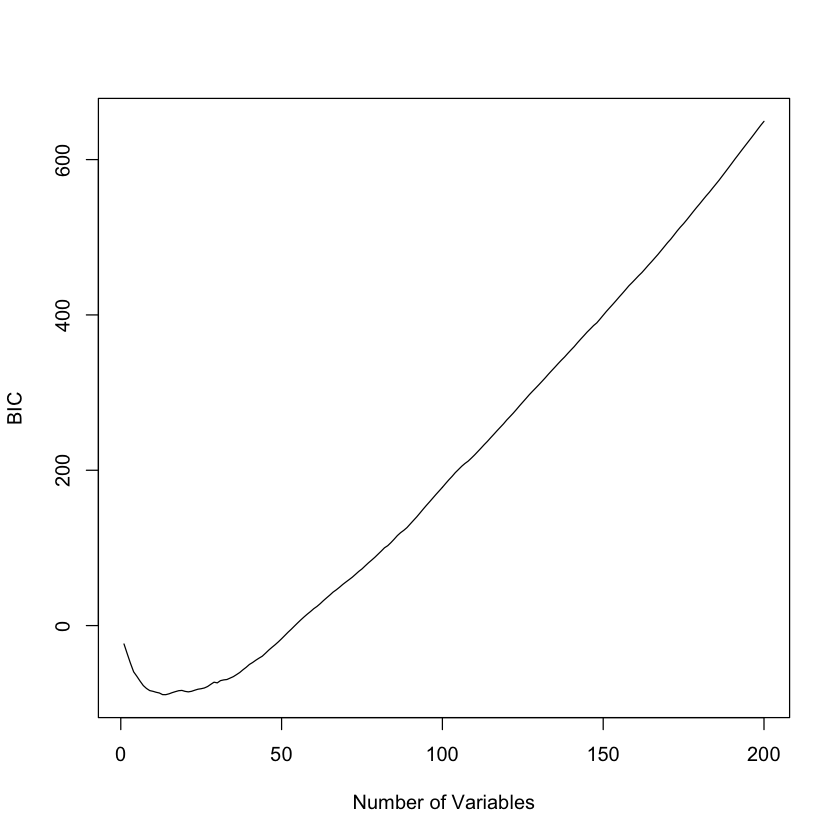

In [222]:

# plot

plot(regfit.fwd.summary$adjr2, type = "l", 
     ,xlab = "Number of Variables", ylab = "adjusted R^2")

adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)


plot(regfit.fwd.summary$cp, type = "l", 
     ,xlab = "Number of Variables", ylab = "CP")
#points(which.min(regfit.fwd.summary$cp), regfit.fwd.summary$adjr2[which.min(regfit.fwd.summary$cp)], col = "red", cex = 2, pch = 20)
plot(regfit.fwd.summary$bic, type = "l", 
     ,xlab = "Number of Variables", ylab = "BIC")





x<- data.frame(
  Adj.R2 = which.max(regfit.fwd.summary$adjr2),
  CP = which.min(regfit.fwd.summary$cp),
  BIC = which.min(regfit.fwd.summary$bic)
)

data_fR <- data[, which(regfit.fwd.summary$which[x$Adj.R2, ]!=0)] #j'ai mis différent de zéro et pas = 
head(data_fR)
data_fCP<-data[, which(regfit.fwd.summary$which[x$CP, ]!=0)]
data_fBIC<-data[, which(regfit.fwd.summary$which[x$BIC, ]!=0)]

dim(data_fR)


In [223]:
datagood.x<-as.matrix((data.train.x_nonvar))
pca<-prcomp(datagood.x, center=TRUE, scale =TRUE)
summary(pca) # two PCs for cumulative proportion of >80% 

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     11.4907 9.5568 8.28188 6.59664 5.68290 5.10259 4.93991
Proportion of Variance  0.1564 0.1082 0.08127 0.05156 0.03826 0.03085 0.02891
Cumulative Proportion   0.1564 0.2647 0.34592 0.39748 0.43575 0.46660 0.49551
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.66841 4.42823 4.20385 3.96953 3.86270 3.50329 3.45779
Proportion of Variance 0.02582 0.02323 0.02094 0.01867 0.01768 0.01454 0.01417
Cumulative Proportion  0.52133 0.54456 0.56550 0.58417 0.60185 0.61639 0.63056
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     3.33979 3.25089 3.09279 3.02391 2.9057 2.86720 2.81769
Proportion of Variance 0.01322 0.01252 0.01133 0.01083 0.0100 0.00974 0.00941
Cumulative Proportion  0.64377 0.65630 0.66763 0.67846 0.6885 0.69821 0.70761
                          PC22    

In [241]:

# extract the principal components
train.components <- cbind(pleasantness = data.train.y, pca$x[, 1:250])
train.components<-as.data.frame(train.components)



In [239]:
lmodel <- lm( pleasantness~ ., data = train.components)

In [240]:
summary(lmodel)


Call:
lm(formula = pleasantness ~ ., data = train.components)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.095  -1.189   0.000   1.429  23.366 

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.857e+02  3.644e+02   0.784   0.4363  
PC1         -3.360e+01  2.343e+01  -1.434   0.1571  
PC2          5.881e+01  5.466e+01   1.076   0.2865  
PC3          2.709e+01  2.813e+01   0.963   0.3397  
PC4          1.502e+01  3.411e+01   0.441   0.6613  
PC5         -4.840e+01  5.072e+01  -0.954   0.3441  
PC6          1.379e+01  2.189e+01   0.630   0.5312  
PC7          3.648e+01  2.454e+01   1.487   0.1427  
PC8          1.605e+01  2.062e+01   0.779   0.4395  
PC9         -3.314e+01  2.403e+01  -1.379   0.1733  
PC10        -2.706e+00  1.976e+01  -0.137   0.8916  
PC11        -1.011e+01  2.065e+01  -0.490   0.6262  
PC12         2.747e+00  2.434e+01   0.113   0.9106  
PC13        -1.353e+01  2.393e+01  -0.565   0

To reconstruct the model in terms of its original variables, first we obtain the coefficients 
from the PCs linear regression model after which we then transform the PCs
component coefficient into coefficients for the original variables by using the eigenvectors of the principal components.

In [485]:
beta0 <- lmodel$coefficients[1]

betas <- lmodel$coefficients[2:39]


alphas <- pca$rotation[,1:38] %*% (betas)

length(alphas)
#To obtain the coefficients of the unscaled data:

 alphas_unscaled <- alphas / sapply(data.train.x_nonvar,sd)

 beta0_unscaled <- beta0 - sum(alphas * sapply(data.train.x_nonvar,mean)/sapply(data.train.x_nonvar,sd))


 # coefficients for unscaled data

est <- (datagood.x) %*% alphas_unscaled +beta0_unscaled


#pour data.train
RSS = sum((est-data.train.y)^2)
TSS = sum((data.train.y-mean(data.train.y))^2)
RSE = sqrt(1/(nrow(data.train) - length(lmodel$coefficients)+1)* RSS)
Rsquared = 1 - RSS/TSS

RSE
Rsquared 






#pour data.train

est.test <-as.matrix((data.test.x_nonvar)) %*% alphas_unscaled



RSS_ = sum((est.test-data.tes.y)^2)
TSS_ = sum((data.test.y-mean(data.test.y))^2)

RSE_ = sqrt(1/(nrow(data.test) - length(lmodel$coefficients)+1)* RSS)
Rsquared_ = 1 - RSS_/TSS_
RSE_
Rsquared_ 

[1] 844

[1] 22.07297

[1] 0.1999229

ERROR: Error in as.matrix((data.test.x_nonvar)) %*% alphas_unscaled: arguments inadéquats


In [259]:
quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/abs(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}
#on a le droit de mettre abs ??
quality.of.fit(fit_2, data.train)
quality.of.fit(fit_2, data.test)





ERROR: Error in eval(predvars, data, env): objet 'PC1' introuvable


--> Gardons les coeff de basé sur adjusted R (CP et BIC enleve trop de predictor)

--> We see that 40 first PC explain 80% of the variability in the data.

In [526]:
#data.train=cbind(plessantness=data.train.y_nonvar, data.train.x_nonvar)
data.train=cbind(data.train.y, data.train.x)
#data.train<-data.train[, which(apply(data.train.x, 2, var)!=0)] 

cormat<- cor(data.train)
highly_corr <- findCorrelation(cormat, 0.9)

data.train <- data.train[,-c(highly_corr)]



fit1<-lm( data.train.y ~ ., data = data.train)
summary(fit1)

Warning message in cor(data.train):
“l'écart type est nulle”


ERROR: Error in findCorrelation_fast(x = x, cutoff = cutoff, verbose = verbose): The correlation matrix has some missing values.


In [413]:
quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/abs(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}
#on a le droit de mettre abs ??
quality.of.fit(fit_2, data.train)
quality.of.fit(fit_2, data.test)




Warning message in predict.lm(fit, data):
“prediction from a rank-deficient fit may be misleading”
Warning message in mean.default(data$pleasantness):
“argument is not numeric or logical: returning NA”


Residual standard error:  0  R^2 =  NaN 


ERROR: Error in eval(predvars, data, env): objet 'P_VSA_MR_4' introuvable


--> on voit clairement que PC ne sont pas suffisante pour representer les données . 

--> l'algorithme ne converge pas..

In [55]:
# compare with the test set ??
#test.predict <- predict(lm,data.test)
quality.of.fit <- function(fit, data) {
    RSS <- sum((data$VALENCE.PLEASANTNESS - predict(fit, data))^2)
    TSS <- sum((data$VALENCE.PLEASANTNESS - mean(data$VALENCE.PLEASANTNESS))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}
#on a le droit de mettre abs ??
quality.of.fit(lm, data.train)
quality.of.fit(lm, data.test)



Warning message:
“'newdata' had 531 rows but variables found have 708 rows”
Warning message in data$VALENCE.PLEASANTNESS - predict(fit, data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”


Residual standard error:  26.9601914196114  R^2 =  -0.347997488385706 


Warning message:
“'newdata' had 177 rows but variables found have 708 rows”


Residual standard error:  47.4935973799884  R^2 =  -3.05131384301372 


**INTERPRETATION :**

RSE very high for the test set 

So this model is too flexible ? 



Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“517  linear dependencies found”


In [16]:
#divide into training and test set 
set.seed(1)
idx.train <- sample(nrow(data), nrow(data)*1/2)
data.train <- data[idx.train,] 
data.test <- data[-idx.train,]

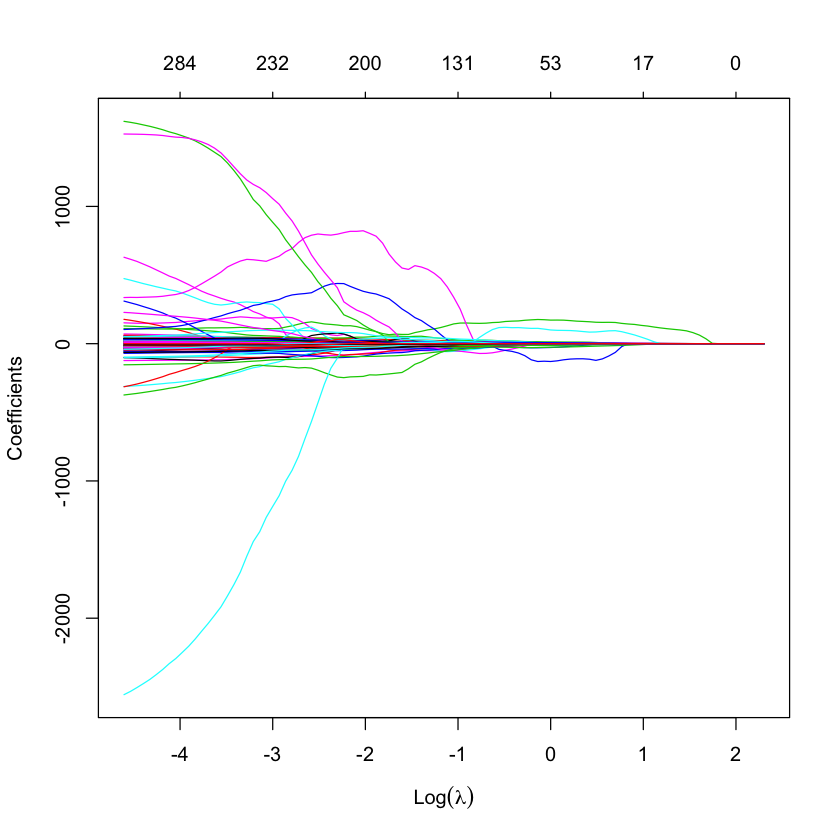

In [495]:
#LASSO L1-REGULARIZATION 
library(glmnet)

x.train <- as.matrix(data.train.x)
y.train <- data.train.y

x.test <- as.matrix(data.test.x)
y.test <- data.test.y
grid =10^seq(1, -2, length = 100)

lasso.mod <- glmnet(x.train, y.train, alpha = 1, lambda = grid)
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

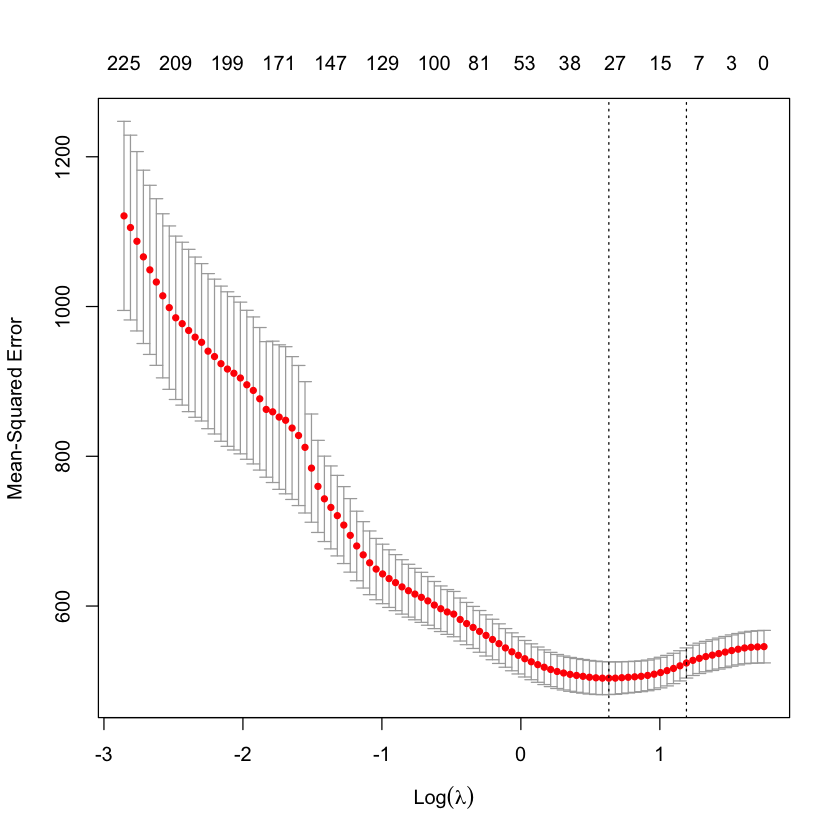

In [496]:
cv.lasso <- cv.glmnet(x.train, y.train, alpha = 1, nfold = 10)
plot(cv.lasso)

In [499]:
best.lasso <- glmnet(x.train, y.train, alpha = 1, lambda = cv.lasso$lambda.min)
bestlam = cv.lasso$lambda.min
lasso_pred = predict(lasso.mod, s = bestlam, newx = x.test)
mean((lasso_pred-y.test)^2)

[1] 482.3463

In [500]:
sum((y.test != lasso_pred)/nrow(data.test))

[1] 1

The coefficient found are much smaller than the ones with multilinear regression 

In [25]:
#LASSO L2-REGULARIZATION 

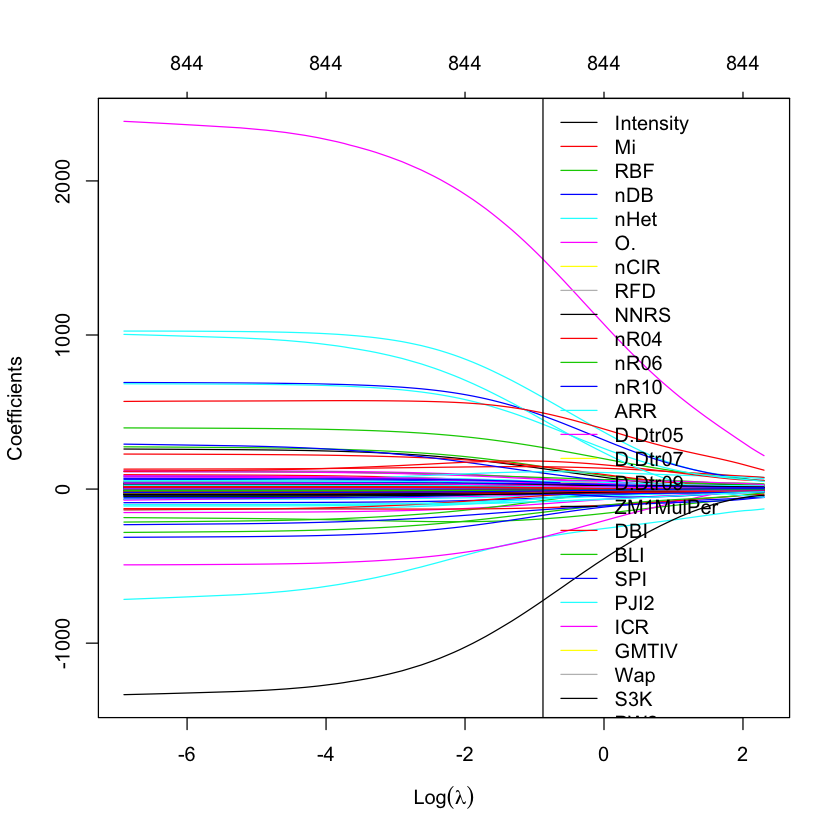

In [501]:

ridge.mod <- glmnet(x.train, y.train, alpha = 0, lambda = 10^seq(1, -3, length = 100))
plot(ridge.mod, "lambda", xlab = parse(text = "Log(lambda)"))
labs = names(ridge.mod$beta[,1]) # extract labels
legend('topright', legend=labs, col=1:length(labs), lty=1) # show legend with labels

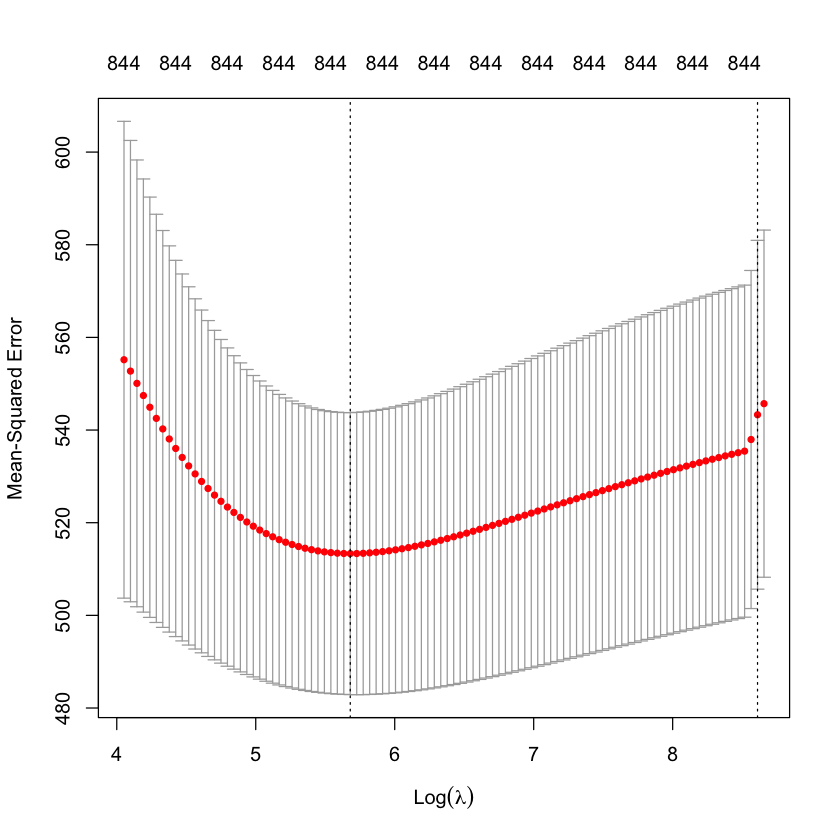

In [502]:
cv.lasso2 <- cv.glmnet(x.train, y.train, alpha = 0, nfold = 10)
plot(cv.lasso2)


In [504]:
bestlam2 = cv.lasso2$lambda.min
best.lasso.1se <- glmnet(x.train, y.train, alpha = 0, lambda = bestlam2)
coef(best.lasso.1se)

852 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)     1.909823e+01
Intensity      -1.020662e-01
Mi             -8.745443e-01
RBF            -6.688388e-01
nDB             1.815128e-05
nHet            8.200351e-03
O.              8.241549e-03
nCIR           -6.022304e-03
RFD             2.514953e-01
NNRS            1.773178e-01
nR04           -2.005493e-01
nR06            8.244167e-02
nR10           -2.349906e-01
ARR            -4.427919e-03
D.Dtr05        -6.889106e-03
D.Dtr07         1.572291e-02
D.Dtr09        -9.969881e-05
ZM1MulPer       5.712579e-04
DBI            -3.306637e-02
BLI             2.518756e-02
SPI             1.946581e-02
PJI2            2.511415e-01
ICR             9.380625e-02
GMTIV          -2.100902e-05
Wap            -9.941592e-05
S3K            -1.345604e-02
PW2             9.029048e-01
PW3             7.838365e-02
PW4             1.295036e+00
MAXDN           2.992737e-02
Psi_i_0d       -1.063643e+00
Psi_i_1d        6.915866e-01


In [27]:

pred = predict(ridge.mod, s = bestlam2, newx = x.test)
mean((pred-y.test)^2)

[1] 244.1669

In [28]:
sum(y.test != pred)/nrow(data.test)

[1] 1

taux d'erreur de 1 ..